In [48]:
# importing relevant modules
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp


In [49]:
# function that performs a single step of the euler method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE
def euler_solve_step(f,h,t,x,args=()):
    x = x + h*f(x,t,args)
    return  x

In [50]:
# function that performs a single step of the 4th-order Runge-Kutta method
# where f is the ODE, h is the time-step, and (x,t) are parameters of ODE
def rk4_solve_step(f,h,t,x,args=()):
    k1 = f(x,t,args)
    k2 = f( x + h*(k1/2),t + h/2)
    k3 = f( x + h*(k2/2),t + h/2)
    k4 = f( x +h*k3,t + h)
    return  x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

In [51]:
deltat_max = 1
# function to solve steps
# where T is the maximum steps and solver can be specified (either euler_solve_step, rk4_solve_step, heuns_solve_step or midpoint_solve_step)
def solve_to(f,h,t,x,T,solver,args=()):
    if h > deltat_max:
        print('The step-size specified is too large')
    else:
        while t+h < T:
            x=solver(f,h,t,x,args=args)
            t = t + h
        if T!=t:
            x=solver(f,T-t,t,x,args=args)
            t = T
        return x

In [52]:
# function to solve systems of ODEs
# 
def solve_ode_system(fun,h,t,X,L,solver,args=()):
    m = []
    for l in L:
        X = solve_to(fun,h,t,X,l,solver,args=args)
        t=l
        m.append(X)
    return m



In [53]:
# setting pararmeters
a = 1
b = 0.2
d= 0.1

In [54]:
# defining a system of 2 ODEs (predator-prey equations)
#def f(t,z,args=(a,b,d)):
    #x, y = z[0], z[1]
    #return [x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)]

In [55]:
# Define a system of ODEs (predator-prey equations)

def fun(X,t,args=(a,b,d)):
    x = X[0]
    y = X[-1]
    return np.array([x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)])

In [113]:
time = np.arange(0,100,0.1)
sol = solve_ode_system(fun,0.1,0,[1,1],time, rk4_solve_step,args=(a,b,d))

In [114]:
# solving the equations
#sol1 = solve_ivp(fun, (0,100),(1,1), args=(a,b,d), rtol=1e-6)

Text(0.5, 1.0, 'Predator-Prey equations using Runge-Kutta method')

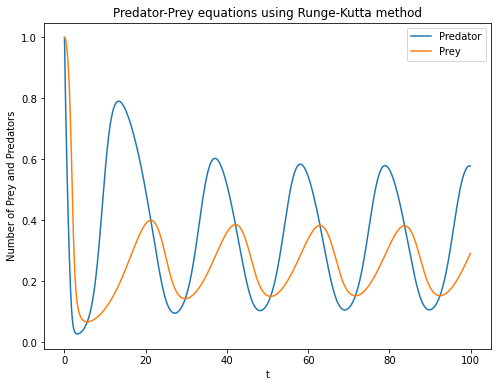

In [115]:
fig=plt.figure(figsize=(8,6)) 
plt.plot(time,[state[0] for state in sol])
plt.plot(time,[state[1] for state in sol])
plt.legend(['Predator','Prey'])
plt.xlabel('t')
plt.ylabel('Number of Prey and Predators')
plt.title('Predator-Prey equations using Runge-Kutta method')


In [59]:
# plotting a graph of the solutions
#plt.plot(sol.t,sol.y[0])
#plt.plot(sol.t,sol.y[1])

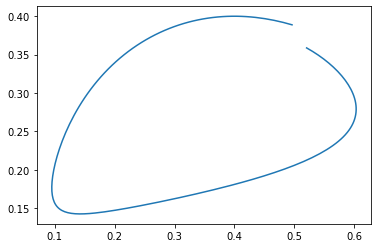

In [60]:
# 
#plt.plot(sol.y[0], sol.y[1])
plt.plot([state[0] for state in sol],[state[1] for state in sol])

In [ ]:
#When b>0.26 over a long-time limit there is convergence 
#When b<0.26 over a long-time limit the amplitude increasescv 

In [ ]:
#Determining an appropriate phase-condition for the limit cycle
#x*(1-x) - (a*x*y)/(d+x) = 0

In [ ]:
#Construct the shooting root-finding problem
#def g(u0, fun, args):
    #u, T = u0[:-1], u0[-1]
    #sol = solve_ivp(fun, (0,T), u, args = args, rtol = 1e-6)
    #final_states = sol.y[:,-1]
    #phase_condition = np.array([fun(T, u, args[0], args[1], args[2])[0]])
    #return np.concatenate((u-final_states, phase_condition))

In [100]:
#Construct the shooting root-finding problem
def g(u0, function, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ode_system(function,0.1,0,u,np.arange(0,T,0.1), rk4_solve_step,args=args)
    final_states = sol[-1]
    phase_condition = np.array([function(u,T,(args[0],args[1],args[2]))[0]])
    return np.concatenate((u-final_states, phase_condition))

In [101]:
  #find the roots of g with an initial guess
from scipy.optimize import fsolve
root = fsolve(g,[1.5,1.5,20],args = (fun, (a,b,d)))
root

/Users/theabarnes/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([ 0.56610791,  0.28816252, 20.0000282 ])

In [ ]:
#plot the solution for one periodic orbit
#sol = solve_ivp(f, (0,root[2]), root[:2], args = (a,b,d), rtol = 1e-6)
#plt.plot(sol.t, sol.y[0])
#plt.plot(sol.t, sol.y[1])

Text(0.5, 1.0, 'Predator-Prey equations using Runge-Kutta method for one periodic orbit')

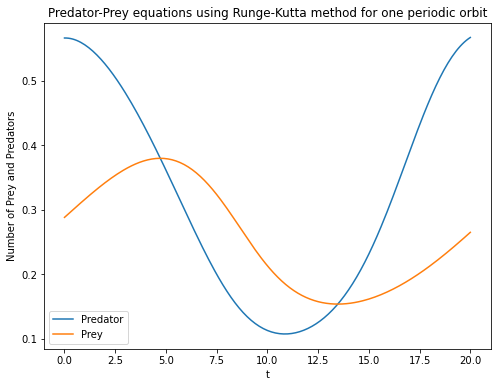

In [112]:
#plot the solution for one periodic orbit
fig=plt.figure(figsize=(8,6)) 
sol = solve_ode_system(fun,0.1,0,root[:2],np.arange(0,root[2],0.1), rk4_solve_step,args=(a,b,d))
plt.plot(np.arange(0,root[2],0.1),[state[0] for state in sol])
plt.plot(np.arange(0,root[2],0.1),[state[-1] for state in sol])
plt.legend(['Predator','Prey'])
plt.xlabel('t')
plt.ylabel('Number of Prey and Predators')
plt.title('Predator-Prey equations using Runge-Kutta method for one periodic orbit')

In [ ]:
# Attempting to generalise the code
# Improvements:
# adjust code such that user can pass the phase-condition
# make adjustments so that it's more general for passing arguments

In [ ]:
#def fun(X,t,args=(a,b,d)):
    #x = X[0]
    #y = X[-1]
    #return np.array([x*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/x)])

In [123]:
# define a system of 3 odes
def h(Z,t,args=(a,b,d)):
    x = Z[0]
    y = Z[1]
    w = Z[-1]
    return np.array([x*w*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/(x))+w, w*(1-x)])

In [124]:
#Construct the shooting root-finding problem
#def g(u0, function, args):
    #u, T = u0[:-1], u0[-1]
    #sol = solve_ode_system(function,0.1,0,u,np.arange(0,T,0.1), rk4_solve_step,args=args)
    #final_states = sol[-1]
    #phase_condition = np.array([function(u,T,(args[0],args[1],args[2]))[0]])
    #return np.concatenate((u-final_states, phase_condition))

In [135]:
#Generalising the code so that you can use arbitrary differential equations of arbitrary dimension
# unsure why this bit isn't currently working
def s(u0, function, args):
    u, T = u0[:-1], u0[-1]
    sol = solve_ode_system(function,0.1,0,u,np.arange(0,T,0.1), rk4_solve_step,args=args)
    final_states = sol[-1]
    phase_condition = np.array([function(u,T, (args[0], args[1], args[2]))[0]])
    return np.concatenate((u-final_states, phase_condition))

In [141]:
#find the roots of h with an initial guess
from scipy.optimize import fsolve
root = fsolve(s,[1,1,1,20],args = (h, (a,b,d)))
root

<ipython-input-123-0677651927b7>:6: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x*w*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/(x))+w, w*(1-x)])
<ipython-input-123-0677651927b7>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([x*w*(1-x) - (a*x*y)/(d+x), (b*y)*(1 - y/(x))+w, w*(1-x)])


array([10., 10., 10., 20.])

In [ ]:
#plot the solution
sol = solve_ivp(h, (0,root[-1]), root[:-1], args = (a,b,d), rtol = 1e-6)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1])